# Quantum gate simulation
A simple example notebook showing some features of ITensor

In [1]:
using ITensors
using Plots

In [2]:
N = 10
s = siteinds("Qubit", N)
sites = 1:N;

Make qubit X and H operators for all sites as well as CNOT gates between all pairs

In [3]:
X = ops(s, [("X", n) for n in sites]);
H = ops(s, [("H", n) for n in sites]);
CX = ops(s, [("CX", n, m) for n in sites, m in sites]);

Initialise the state |0000...⟩

In [4]:
ψ0 = productMPS(s, "0");

Flip to the state |1010...⟩

In [5]:
gates = [X[n] for n in 1:2:N]
ψ = apply(gates, ψ0; cutoff=1e-15);

Check the result is as expected:

In [6]:
@assert inner(ψ, productMPS(s, n -> isodd(n) ? "1" : "0")) ≈ 1

1     -1.0
2     1.0
3     -1.0
4     1.0
5     -1.0
6     1.0
7     -1.0
8     1.0
9     -1.0
10    1.0


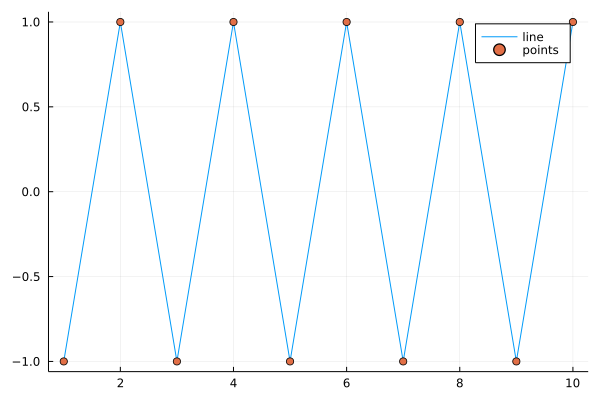

In [7]:
magz = expect(ψ,"Z");
for j in sites
    println(rpad(j,6," "),magz[j])
end
plot(sites, magz, label="line")  
scatter!(sites, magz, label="points") 

Apply CNOT gates on qubits 1-4 and 5-8 to create |10111011...⟩

In [8]:
append!(gates, [CX[n, n + 3] for n in 1:4:(N - 3)])
ψ = apply(gates, ψ0; cutoff=1e-15);

In [9]:
@assert inner(ψ, productMPS(s, ["1", "0", "1", "1", "1", "0", "1", "1", "1", "0"])) ≈ 1

1     -1.0
2     1.0
3     -1.0
4     -1.0
5     -1.0
6     1.0
7     -1.0
8     -1.0
9     -1.0
10    1.0


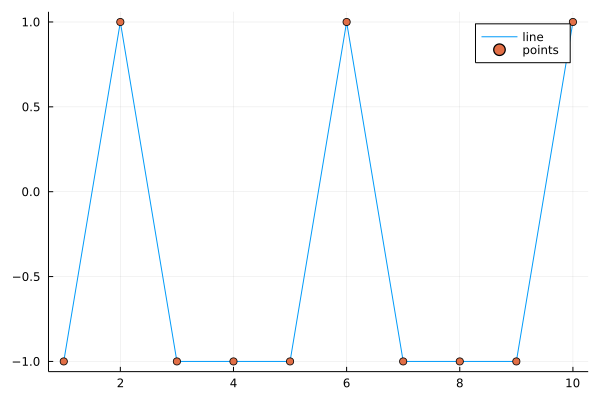

In [10]:
magz = expect(ψ,"Z");
for j in sites
    println(rpad(j,6," "),magz[j])
end
plot(sites, magz, label="line")  
scatter!(sites, magz, label="points") 

Add a final layer of Hadamard gates to the circuit to swap into the |+⟩,|-⟩ basis

In [11]:
append!(gates, [H[n] for n in sites])
ψ = apply(gates, ψ0; cutoff=1e-15);

1     -1.0
2     1.0
3     -1.0
4     -1.0
5     -1.0
6     1.0
7     -1.0
8     -1.0
9     -1.0
10    1.0


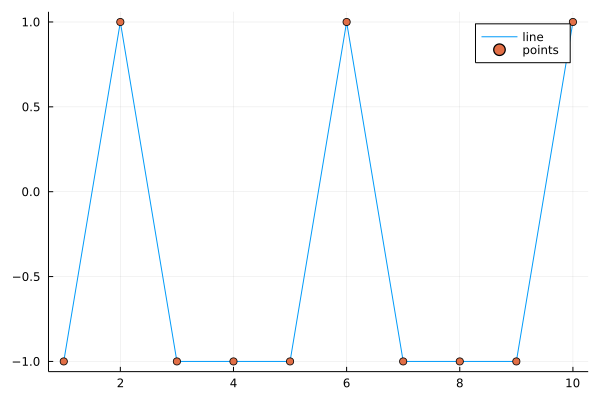

In [12]:
magx = expect(ψ,"X");
for j in sites
    println(rpad(j,6," "),magx[j])
end
plot(sites, magx, label="line")  
scatter!(sites, magx, label="points")